In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
!pip install ipython-autotime
%load_ext autotime

  Using cached jedi-0.19.1-py2.py3-none-any.whl.metadata (22 kB)
Using cached jedi-0.19.1-py2.py3-none-any.whl (1.6 MB)
time: 1.64 ms (started: 2024-08-09 12:52:09 +00:00)


In [3]:
from google.colab import drive
drive.mount('/content/drive')

MessageError: Error: credential propagation was unsuccessful

time: 17.5 s (started: 2024-08-09 12:52:09 +00:00)


In [ ]:
from google.colab import files
import os
import shutil

os.makedirs('/content/data', exist_ok=True)

# Copy the data files from Google Drive to Colab

shutil.copy('/content/drive/MyDrive/THESIS/classifiers/data/data_p14_preprocessed.csv', '/content/data/data_p14_preprocessed.csv')

# Copy scripts from Google Drive to Colab
shutil.copy('/content/drive/MyDrive/THESIS/classifiers/scripts/feature_selectors.py', '/content/feature_selectors.py')
shutil.copy('/content/drive/MyDrive/THESIS/classifiers/scripts/knn_classifier.py', '/content/knn_classifier.py')
shutil.copy('/content/drive/MyDrive/THESIS/classifiers/scripts/utils.py', '/content/utils.py')

'/content/utils.py'

time: 890 ms (started: 2024-07-22 08:27:43 +00:00)


# Phonation Mode KNN Classification

This classification is just for 2 phonation modes (for the partciipant used for building this model) and might need extending based on the participant used. This would also require labelleing unlabelled participants phonation modes.

Using multilayer perceptron model could prove better for more complex classification tasks. Used in Furkan thesis/paper in phonation mode classification. However, since phonation is only using 2 classes, the MLP is forth developed for the recording condition classification task.

As the phonation classification for this is simply a 2 way classification task, a KNN should be sufficient for the task. Therefore it is the forst thing tested. However, of course should the phonation modes supported increase, then the classification task would become more complex and using a simple KNN would liekly not suffice.

In [ ]:
RANDOM_STATE = 42
DATA_FILE = 'data/data_p14_preprocessed.csv'

from knn_classifier import train_and_test_knn, evaluate_model
from utils import prepare_data, plot_confusion_matrix, calculate_metrics_2_class, remove_specified_conditions
from sklearn.model_selection import train_test_split

time: 1.03 ms (started: 2024-07-22 08:28:03 +00:00)


## 1. Complete data

Accuracy:  0.9281
Returned F1 score:  0.9281
Precision:  0.9107
Recall:  0.9431
Specificity:  0.9142
False positive rate:  0.0858


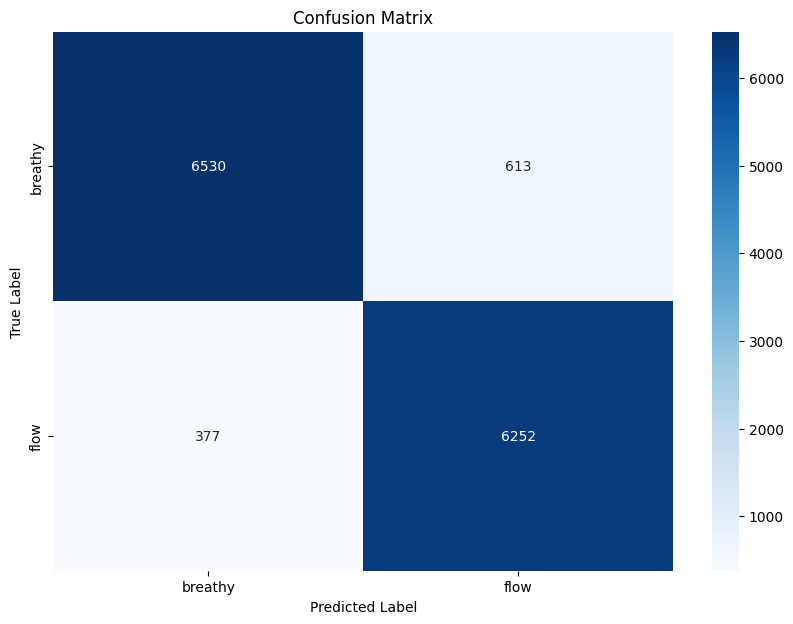

time: 25.6 s (started: 2024-07-22 08:28:03 +00:00)


In [ ]:
x, y = prepare_data(DATA_FILE, audio_source='computer', classify='phonation', algorithm='knn')
class_names = y.unique()

# Split data into training and test sets
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=RANDOM_STATE, stratify=y)

#train and evaluate model
y_pred = train_and_test_knn(x_train, y_train, x_test)
accuracy, f1, conf_matrix = evaluate_model(y_test, y_pred)
precision, recall, specificity, fpr = calculate_metrics_2_class(conf_matrix)

print("Accuracy: ", round(accuracy, 4))
print("Returned F1 score: ", round(f1, 4))
print("Precision: ", round(precision, 4))
print("Recall: ", round(recall, 4))
print("Specificity: ", round(specificity, 4))
print("False positive rate: ", round(fpr, 4))

plot_confusion_matrix(conf_matrix, class_names=class_names)


#### Top 5 features only

Selected features:  Index(['computer_mfcc_1', 'computer_mfcc_3', 'computer_pose_landmark_13_y',
       'computer_pose_landmark_24_z', 'computer_pose_landmark_25_z'],
      dtype='object')
Accuracy:  0.8146
Returned F1 score:  0.8146
Precision:  0.7861
Recall:  0.8445
Specificity:  0.7868
False positive rate:  0.2132


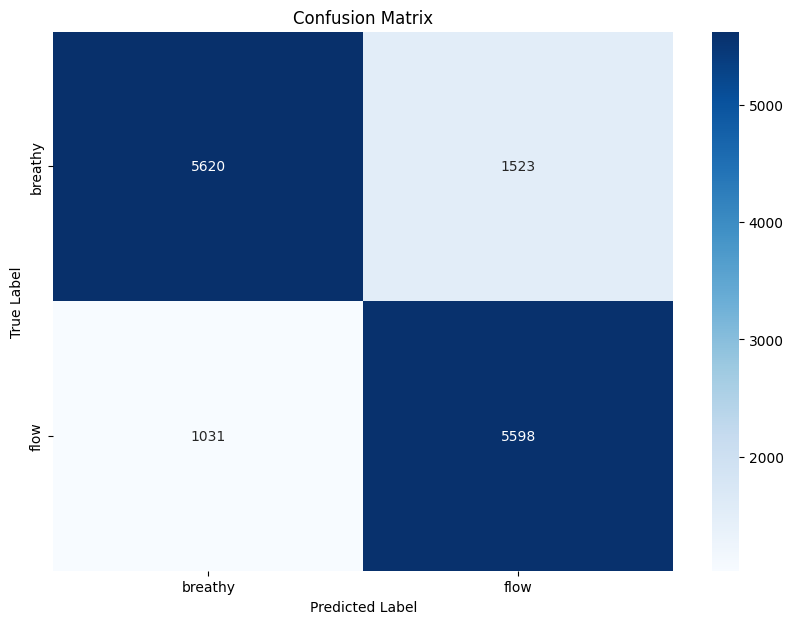

time: 6.59 s (started: 2024-07-22 08:28:28 +00:00)


In [ ]:
x, y = prepare_data(DATA_FILE, audio_source='computer', classify='phonation', algorithm='knn', num_features=5)
class_names = y.unique()

# Split data into training and test sets
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=RANDOM_STATE, stratify=y)

#train and evaluate model
y_pred = train_and_test_knn(x_train, y_train, x_test)
accuracy, f1, conf_matrix = evaluate_model(y_test, y_pred)
precision, recall, specificity, fpr = calculate_metrics_2_class(conf_matrix)

print("Accuracy: ", round(accuracy, 4))
print("Returned F1 score: ", round(f1, 4))
print("Precision: ", round(precision, 4))
print("Recall: ", round(recall, 4))
print("Specificity: ", round(specificity, 4))
print("False positive rate: ", round(fpr, 4))

plot_confusion_matrix(conf_matrix, class_names=class_names)

The automatic feature selection is not robust enough, because it doesn't understand the data. Unfortunately the positioning of the camera for the two phonation conditions is slightly different, meaning that the lower limb points are or are not visible more depending on thephonation mode condition.

Therefore, feature selection must be done after disregarding the lower

## 2. Audio Only

In [ ]:
modalities = [
    "audio"
]

time: 861 µs (started: 2024-07-22 08:28:35 +00:00)


#### All audio features

Accuracy:  0.8522
Returned F1 score:  0.8521
Precision:  0.8515
Recall:  0.8392
Specificity:  0.8642
False positive rate:  0.1358


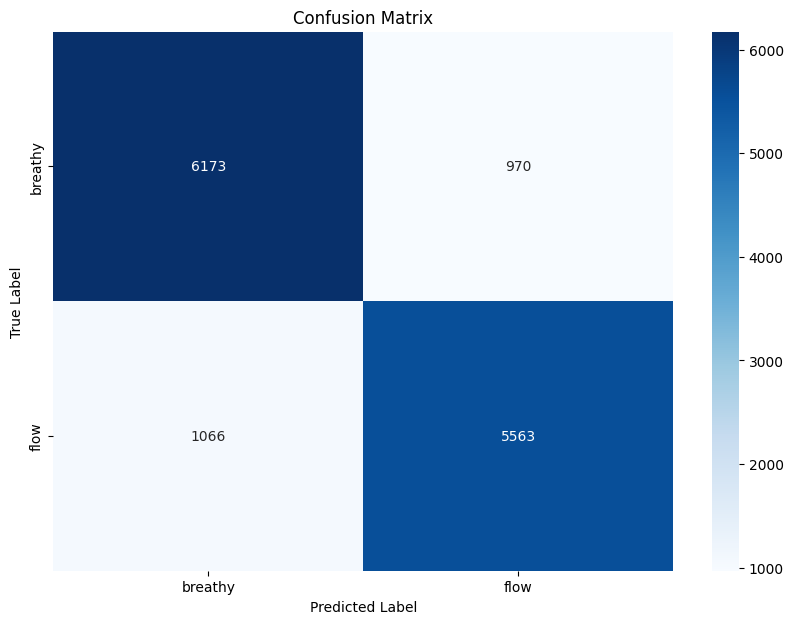

time: 11.8 s (started: 2024-07-22 08:28:35 +00:00)


In [ ]:
x, y = prepare_data(DATA_FILE, audio_source='computer', classify='phonation', algorithm='knn', modalities=modalities)
class_names = y.unique()

# Split data into training and test sets
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=RANDOM_STATE, stratify=y)

#train and evaluate model
y_pred = train_and_test_knn(x_train, y_train, x_test)
accuracy, f1, conf_matrix = evaluate_model(y_test, y_pred)
precision, recall, specificity, fpr = calculate_metrics_2_class(conf_matrix)

print("Accuracy: ", round(accuracy, 4))
print("Returned F1 score: ", round(f1, 4))
print("Precision: ", round(precision, 4))
print("Recall: ", round(recall, 4))
print("Specificity: ", round(specificity, 4))
print("False positive rate: ", round(fpr, 4))

plot_confusion_matrix(conf_matrix, class_names=class_names)

#### Top 5 audio features

Selected features:  Index(['computer_rms_energy', 'computer_spec_slope', 'computer_spec_decr',
       'computer_mfcc_1', 'computer_mfcc_3'],
      dtype='object')
Accuracy:  0.8138
Returned F1 score:  0.8138
Precision:  0.7856
Recall:  0.8434
Specificity:  0.7864
False positive rate:  0.2136


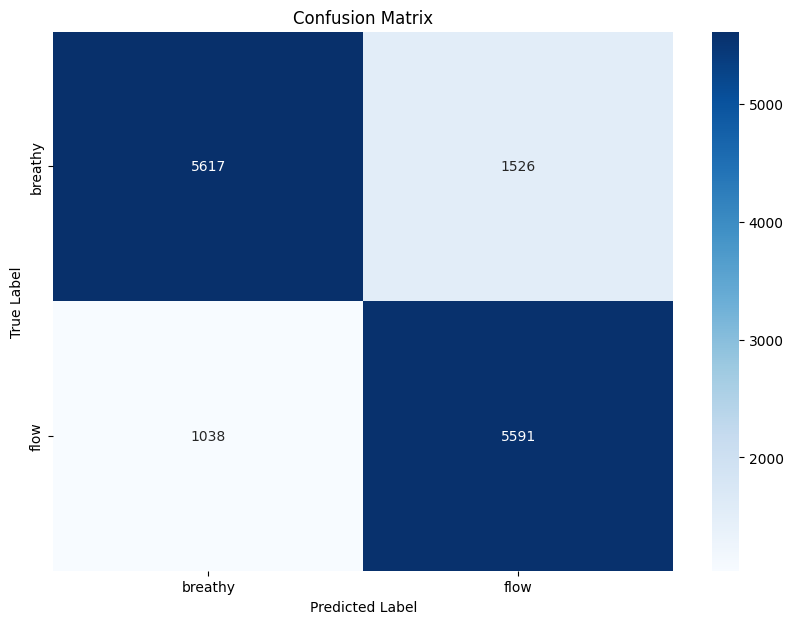

time: 6.12 s (started: 2024-07-22 08:28:47 +00:00)


In [ ]:
x, y = prepare_data(DATA_FILE, audio_source='computer', classify='phonation', algorithm='knn', modalities=modalities, num_features=5)
class_names = y.unique()

# Split data into training and test sets
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=RANDOM_STATE, stratify=y)

#train and evaluate model
y_pred = train_and_test_knn(x_train, y_train, x_test)
accuracy, f1, conf_matrix = evaluate_model(y_test, y_pred)
precision, recall, specificity, fpr = calculate_metrics_2_class(conf_matrix)

print("Accuracy: ", round(accuracy, 4))
print("Returned F1 score: ", round(f1, 4))
print("Precision: ", round(precision, 4))
print("Recall: ", round(recall, 4))
print("Specificity: ", round(specificity, 4))
print("False positive rate: ", round(fpr, 4))

plot_confusion_matrix(conf_matrix, class_names=class_names)

## 3. Video Only

In [ ]:
modalities = [
    "video"
]

time: 1.18 ms (started: 2024-07-22 08:28:53 +00:00)


Accuracy:  0.9999
Returned F1 score:  0.9999
Precision:  1.0
Recall:  0.9998
Specificity:  1.0
False positive rate:  0.0


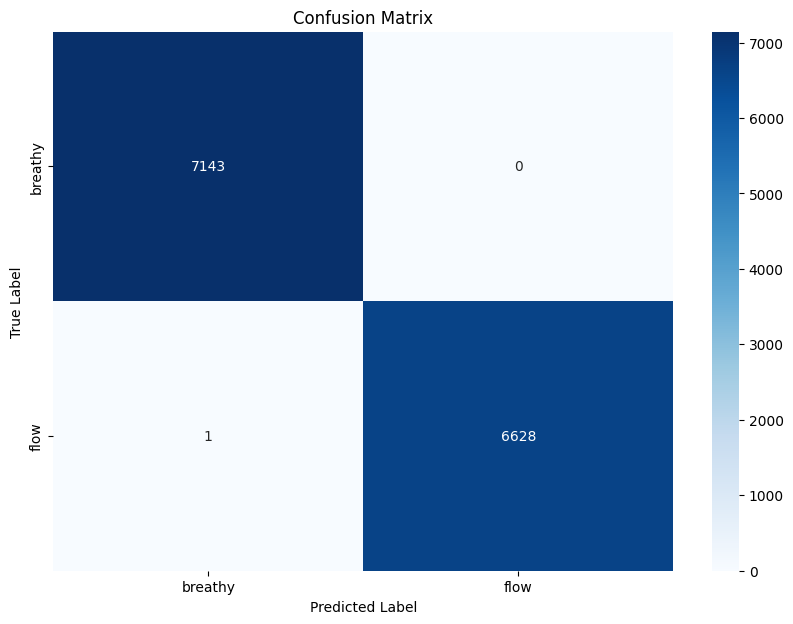

time: 23.8 s (started: 2024-07-22 08:28:53 +00:00)


In [ ]:
x, y = prepare_data(DATA_FILE, audio_source='computer', classify='phonation', algorithm='knn', modalities=modalities)
class_names = y.unique()

# Split data into training and test sets
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=RANDOM_STATE, stratify=y)

#train and evaluate model
y_pred = train_and_test_knn(x_train, y_train, x_test)
accuracy, f1, conf_matrix = evaluate_model(y_test, y_pred)
precision, recall, specificity, fpr = calculate_metrics_2_class(conf_matrix)

print("Accuracy: ", round(accuracy, 4))
print("Returned F1 score: ", round(f1, 4))
print("Precision: ", round(precision, 4))
print("Recall: ", round(recall, 4))
print("Specificity: ", round(specificity, 4))
print("False positive rate: ", round(fpr, 4))

plot_confusion_matrix(conf_matrix, class_names=class_names)

#### Top 5 video features

Selected features:  Index(['computer_pose_landmark_10_y', 'computer_pose_landmark_11_y',
       'computer_pose_landmark_13_y', 'computer_pose_landmark_24_z',
       'computer_pose_landmark_25_z'],
      dtype='object')
Accuracy:  1.0
Returned F1 score:  1.0
Precision:  1.0
Recall:  1.0
Specificity:  1.0
False positive rate:  0.0


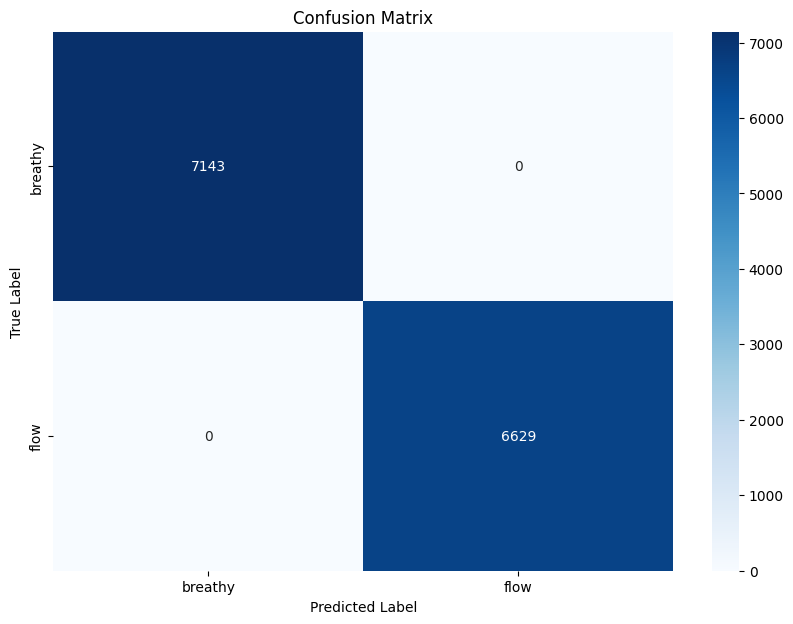

time: 7.32 s (started: 2024-07-22 08:29:17 +00:00)


In [ ]:
x, y = prepare_data(DATA_FILE, audio_source='computer', classify='phonation', algorithm='knn', modalities=modalities, num_features=5)
class_names = y.unique()

# Split data into training and test sets
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=RANDOM_STATE, stratify=y)

#train and evaluate model
y_pred = train_and_test_knn(x_train, y_train, x_test)
accuracy, f1, conf_matrix = evaluate_model(y_test, y_pred)
precision, recall, specificity, fpr = calculate_metrics_2_class(conf_matrix)

print("Accuracy: ", round(accuracy, 4))
print("Returned F1 score: ", round(f1, 4))
print("Precision: ", round(precision, 4))
print("Recall: ", round(recall, 4))
print("Specificity: ", round(specificity, 4))
print("False positive rate: ", round(fpr, 4))

plot_confusion_matrix(conf_matrix, class_names=class_names)

## 4. Biosignal Data Only

In [ ]:
modalities = [
    "biosignals"
]

time: 1.9 ms (started: 2024-07-22 08:29:24 +00:00)


Accuracy:  0.6165
Returned F1 score:  0.6166
Precision:  0.601
Recall:  0.6052
Specificity:  0.627
False positive rate:  0.373


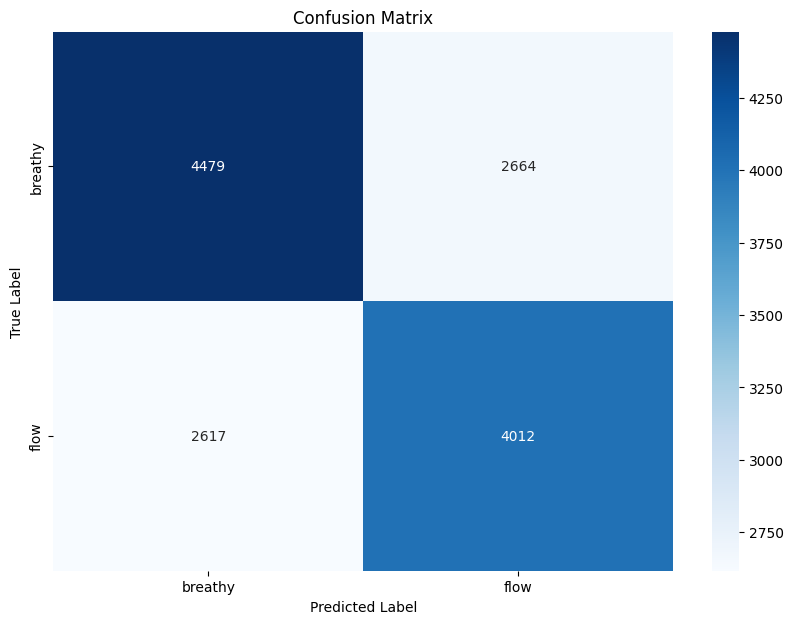

time: 7.85 s (started: 2024-07-22 08:29:25 +00:00)


In [ ]:
x, y = prepare_data(DATA_FILE, audio_source='computer', classify='phonation', algorithm='knn', modalities=modalities)
class_names = y.unique()

# Split data into training and test sets
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=RANDOM_STATE, stratify=y)

#train and evaluate model
y_pred = train_and_test_knn(x_train, y_train, x_test)
accuracy, f1, conf_matrix = evaluate_model(y_test, y_pred)
precision, recall, specificity, fpr = calculate_metrics_2_class(conf_matrix)

print("Accuracy: ", round(accuracy, 4))
print("Returned F1 score: ", round(f1, 4))
print("Precision: ", round(precision, 4))
print("Recall: ", round(recall, 4))
print("Specificity: ", round(specificity, 4))
print("False positive rate: ", round(fpr, 4))

plot_confusion_matrix(conf_matrix, class_names=class_names)